In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("C:\\Users\\hp\\Desktop\\Projects Data\\ds_salaries.csv")

In [11]:
# Display basic information about the dataset
print("\nBasic Information:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

print("\nFirst 5 Rows:")
print(df.head())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB
None

Summary Statistics:
       Unnamed: 0    work_year        salary  salary_in_usd  remote_ratio
count  607.000000   607.000000  6.070000e+02     607

In [13]:
# Data Cleaning and Preprocessing
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [ ]:
# Droping unnecessary column
df.drop(columns=['Unnamed: 0'], inplace=True)

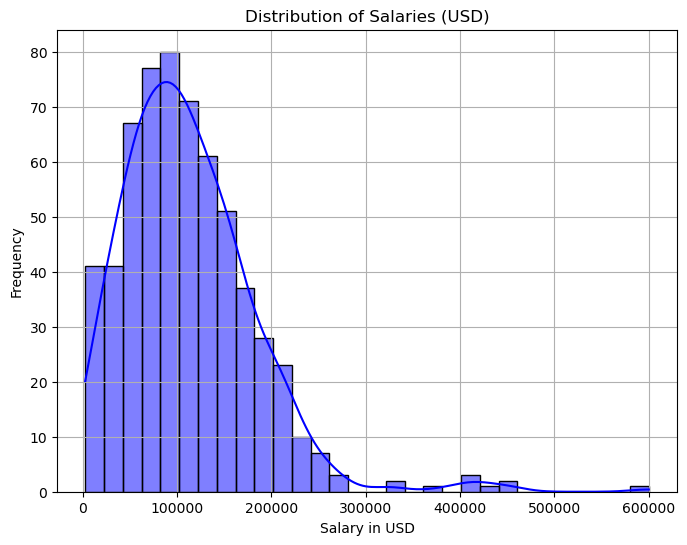

In [20]:
# Exploratory Data Analysis (EDA)
# 1. Salary Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True, color='blue')
plt.title('Distribution of Salaries (USD)')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

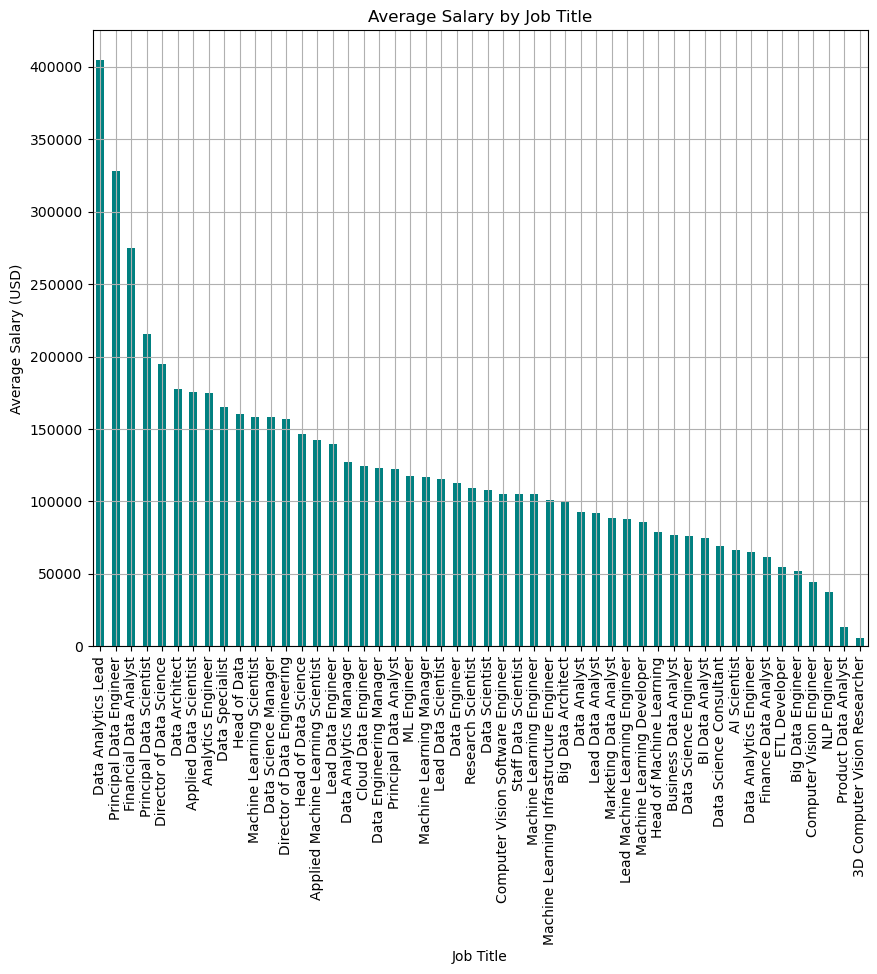

In [22]:
# 2. Salary by Job Title
plt.figure(figsize=(10, 8))
job_salary = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
job_salary.plot(kind='bar', color='teal')
plt.title('Average Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

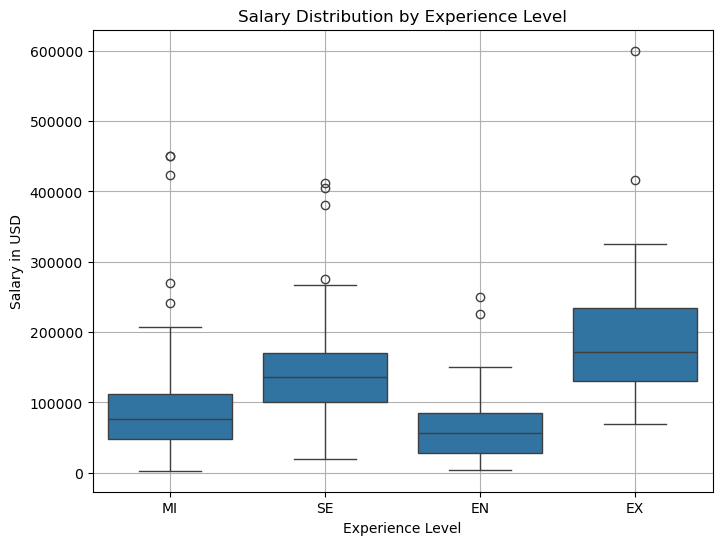

In [24]:
# 3. Salary by Experience Level
plt.figure(figsize=(8, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.grid(True)
plt.show()

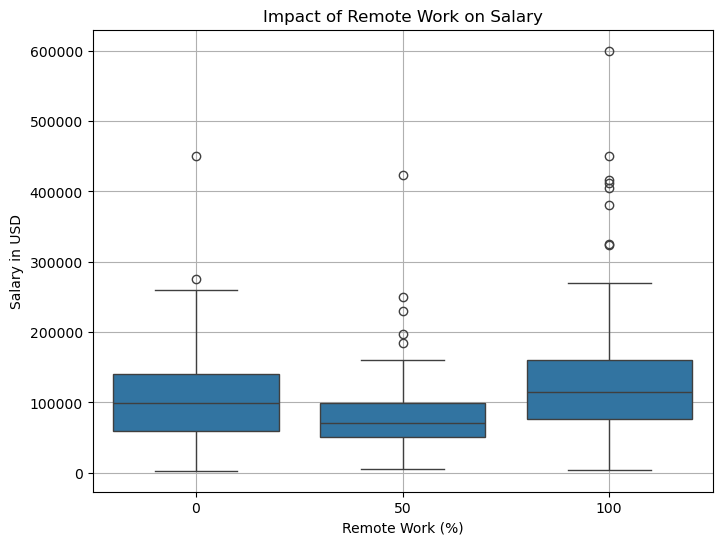

In [26]:
# 4. Remote Work Impact on Salary
plt.figure(figsize=(8, 6))
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=df)
plt.title('Impact of Remote Work on Salary')
plt.xlabel('Remote Work (%)')
plt.ylabel('Salary in USD')
plt.grid(True)
plt.show()

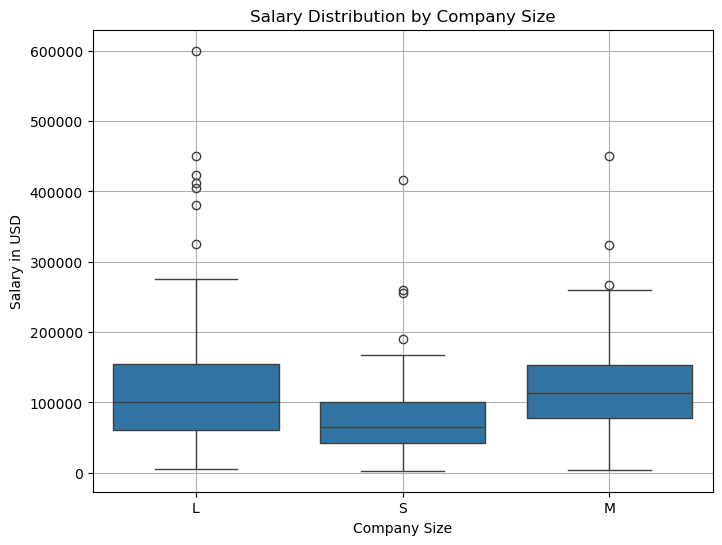

In [28]:
# 5. Salary by Company Size
plt.figure(figsize=(8, 6))
sns.boxplot(x='company_size', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.grid(True)
plt.show()

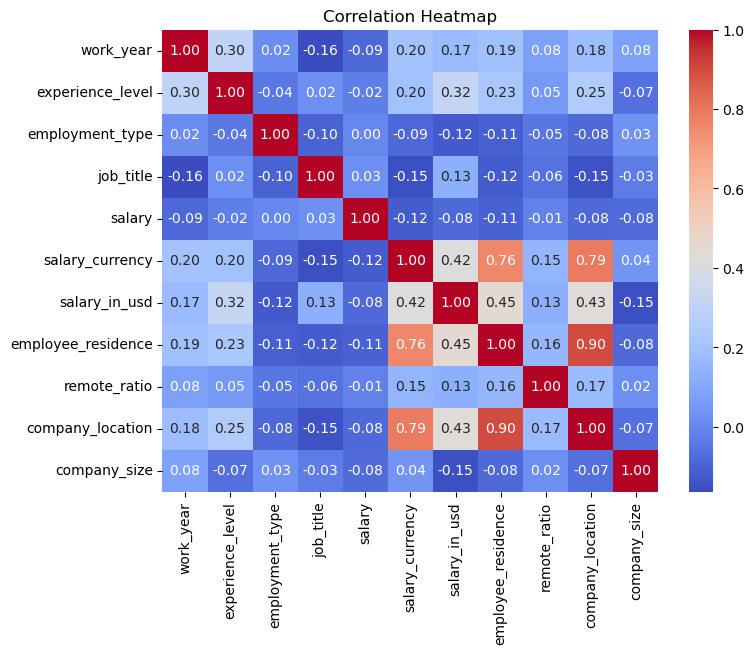

In [38]:
# 6. Correlation Heatmap
# Convert all object type columns to numeric codes for correlation
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category').cat.codes

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [44]:
df.to_csv(r"C:\Users\hp\Desktop\Projects Data\cleaned_ds_salaries.csv", index=False)